In [23]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers


# The names will be the names of each column in our pandas DataFrame
names = ['age', 'sex', 'chestpaintype', 'restingbp', 'chol', 'fbs', 'restecg', 'maxhr', 'exang', 'oldpeak', 'slope']

# Read the CSV

data = pd.read_csv('/content/heart.csv')

validation_data = pd.read_csv('/content/cleveland_changed (1).csv')



# dropping the last column
data = data.drop(columns=['HeartDisease'])
validation_data = validation_data.drop(columns=['HeartDisease'])

In [24]:
# Data Imputation
DI = data.copy()

for Fi in DI.columns:
    if DI[Fi].isna().sum() > 0.6 * len(DI):
        # Drop the column if majority values are missing
        DI = DI.drop(columns=[Fi])
    elif DI[Fi].dtype == 'object' and DI[Fi].isna().sum() < 0.4 * len(DI):
        # Fill missing categorical values with the majority label
        DI[Fi].replace('?', DI[Fi].mode().iloc[0], inplace=True)  # Replace '?' with the majority label
        DI[Fi].fillna(DI[Fi].mode().iloc[0], inplace=True)  # Fill remaining missing categorical values
    elif DI[Fi].dtype != 'object' and DI[Fi].isna().sum() < 0.4 * len(DI):
        # Fill missing numeric values with the median
        DI[Fi].replace('?', DI[Fi].median(), inplace=True)  # Replace '?' with the median
        DI[Fi].fillna(DI[Fi].median(), inplace=True)  # Fill remaining missing numeric values


# # Update the original data with imputed values
data.update(DI)
# print the last twenty or so data points with imputed value
data.loc[280:]

,Age,Sex,ChestPainType,RestingBP,Cholestrol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
280,45,F,ATA,130,234,0,Normal,175,N,0.6,Flat
281,35,M,ATA,122,192,0,ST,174,N,0.0,Down
282,41,F,ATA,130,204,0,Normal,172,N,1.4,Down
283,64,M,ASY,110,211,0,Normal,144,Y,1.8,Flat
284,58,M,NAP,132,224,0,Normal,173,N,3.2,Down
...,...,...,...,...,...,...,...,...,...,...,...
1931,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
1932,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
1933,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
1934,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


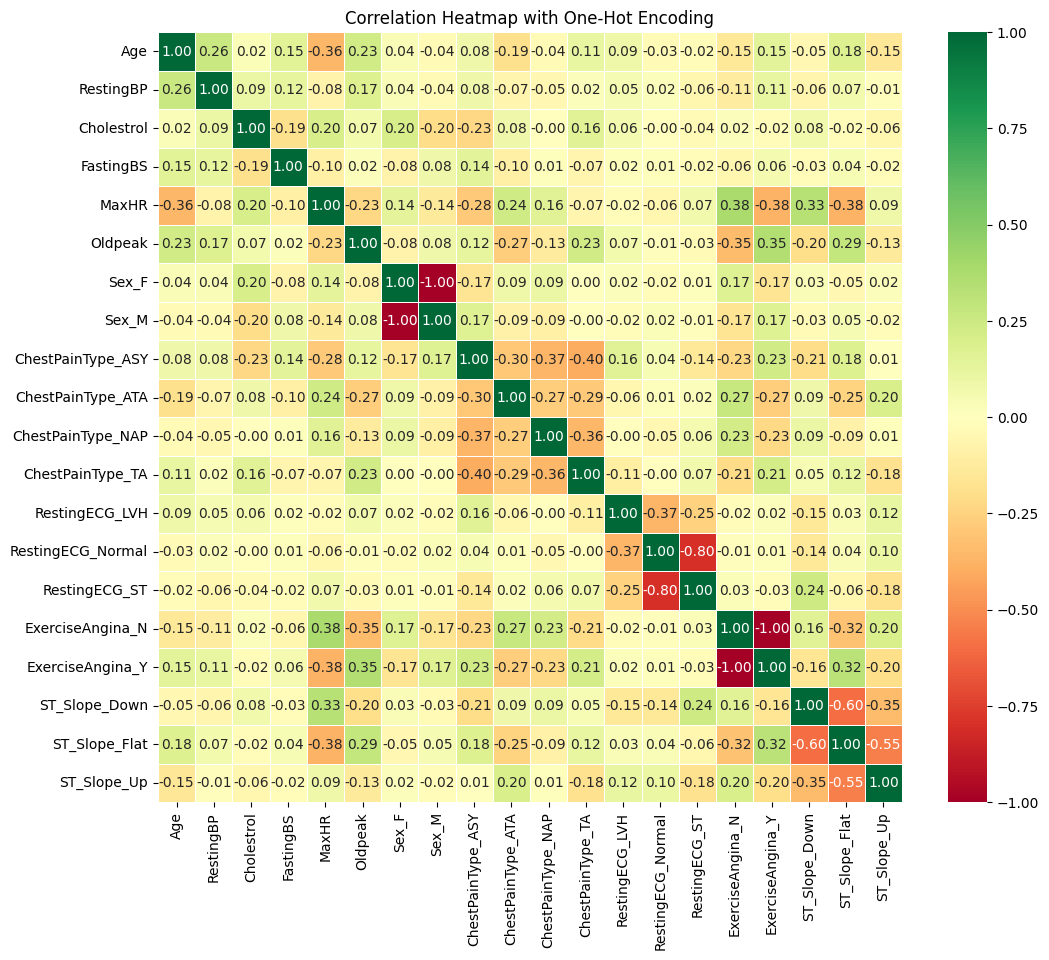

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with both categorical and numerical features
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(data)

# Generate correlation matrix
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with One-Hot Encoding")
plt.show()

In [26]:
train_data = data

num_rows_train = train_data.shape[0]
num_rows_validation = validation_data.shape[0]

print("Number of rows in train_data:", num_rows_train)
print("Number of rows in validation_data:", num_rows_validation)

Number of rows in train_data: 1936
Number of rows in validation_data: 303


In [27]:
print(train_data['ChestPainType'].value_counts())

ASY    568
TA     543
NAP    487
ATA    338
Name: ChestPainType, dtype: int64


In [28]:
# Define categorical features
categorical_features = ['Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Convert categorical features to categorical type
train_data[categorical_features] = train_data[categorical_features].astype('category')

# Separate features and labels
X = train_data.drop('ChestPainType', axis=1)
y = train_data['ChestPainType']

# Convert categorical labels to numerical form
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=np.number))

# One-hot encode categorical features
X_categorical = pd.get_dummies(X[categorical_features])

# Concatenate scaled numerical features with one-hot encoded categorical features
X_final = np.concatenate([X_scaled, X_categorical], axis=1)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_final.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(train_data['ChestPainType'].unique()), activation='softmax')  # Output layer with so
    ])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [29]:
# Train the model
history = model.fit(X_final, y_encoded, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
194/194 - 1s - loss: 1.2188 - accuracy: 0.4194 - 953ms/epoch - 5ms/step
Epoch 2/100
194/194 - 0s - loss: 1.1260 - accuracy: 0.4830 - 320ms/epoch - 2ms/step
Epoch 3/100
194/194 - 0s - loss: 1.0886 - accuracy: 0.5103 - 289ms/epoch - 1ms/step
Epoch 4/100
194/194 - 0s - loss: 1.0669 - accuracy: 0.5269 - 289ms/epoch - 1ms/step
Epoch 5/100
194/194 - 0s - loss: 1.0432 - accuracy: 0.5418 - 300ms/epoch - 2ms/step
Epoch 6/100
194/194 - 0s - loss: 1.0222 - accuracy: 0.5537 - 282ms/epoch - 1ms/step
Epoch 7/100
194/194 - 0s - loss: 1.0003 - accuracy: 0.5718 - 290ms/epoch - 1ms/step
Epoch 8/100
194/194 - 0s - loss: 0.9769 - accuracy: 0.5801 - 431ms/epoch - 2ms/step
Epoch 9/100
194/194 - 0s - loss: 0.9562 - accuracy: 0.5987 - 409ms/epoch - 2ms/step
Epoch 10/100
194/194 - 0s - loss: 0.9358 - accuracy: 0.6105 - 452ms/epoch - 2ms/step
Epoch 11/100
194/194 - 0s - loss: 0.9093 - accuracy: 0.6286 - 428ms/epoch - 2ms/step
Epoch 12/100
194/194 - 0s - loss: 0.8893 - accuracy: 0.6400 - 421ms/epoch 

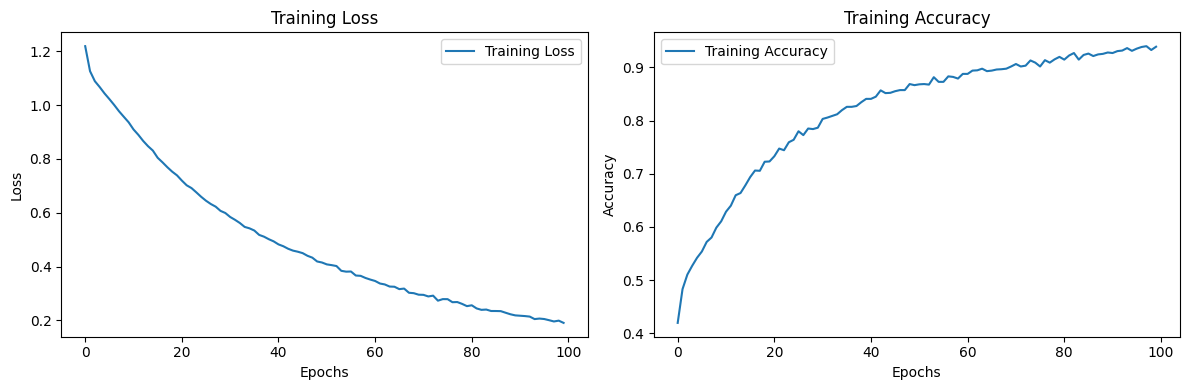

In [30]:
# Plotting the learning curve
plt.figure(figsize=(12, 4))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
from tensorflow.keras.models import load_model

# Convert categorical features to categorical type
validation_data[categorical_features] = validation_data[categorical_features].astype('category')

# Separate features and labels
X_test = validation_data.drop('ChestPainType', axis=1)
y_test = validation_data['ChestPainType']

# Convert categorical labels to numerical form
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Standardize numerical features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test.select_dtypes(include=np.number))

# One-hot encode categorical features
X_test_categorical = pd.get_dummies(X_test[categorical_features])

X_val_final = np.concatenate([X_test_scaled, X_test_categorical], axis=1)

y_val_encoded = label_encoder.transform(validation_data['ChestPainType'])
y_val_pred = np.argmax(model.predict(X_val_final), axis=1)
accuracy_val = accuracy_score(y_val_encoded, y_val_pred)
print(f"Validation Accuracy: {accuracy_val*100:.2f}%")

10/10 [==============================] - 0s 2ms/step
Validation Accuracy: 80.53%


10/10 [==============================] - 0s 2ms/step


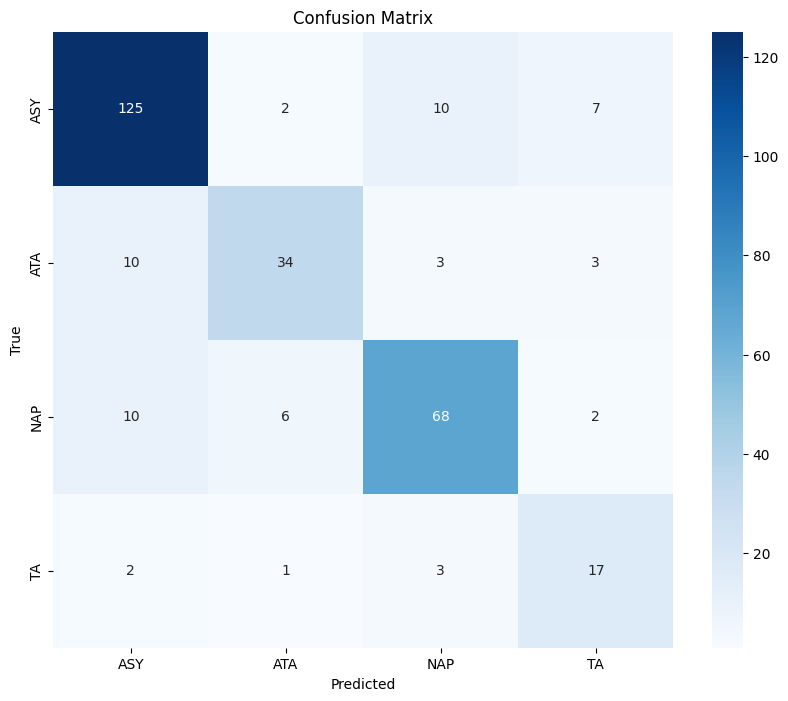

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predictions
y_val_probabilities = model.predict(X_val_final)
y_val_pred = np.argmax(y_val_probabilities, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val_encoded, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
import pandas as pd
import numpy as np

# Load test records from a CSV file
test_records = pd.read_csv('/content/cleveland_changed (1).csv')

# Convert categorical features to categorical type
test_records[categorical_features] = test_records[categorical_features].astype('category')

# Select only the features used during training (exclude the target variable)
test_records_for_prediction = test_records[['Age', 'Sex', 'RestingBP', 'Cholestrol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

# Standardize numerical features
test_records_scaled = scaler.fit_transform(test_records_for_prediction.select_dtypes(include=np.number))

# One-hot encode categorical features
test_records_categorical = pd.get_dummies(test_records_for_prediction[categorical_features])

# Ensure that the column order and names match the training data
test_records_categorical = test_records_categorical.reindex(columns=X_categorical.columns, fill_value=0)

# Concatenate scaled numerical features with one-hot encoded categorical features
test_records_final = np.concatenate([test_records_scaled, test_records_categorical], axis=1)

# Make predictions for the test records
predicted_classes = model.predict(test_records_final)

# Decode the predicted classes using label encoder
predicted_classes_decoded = label_encoder.inverse_transform(np.argmax(predicted_classes, axis=1))

# Get true classes from the test data
true_classes = test_records['ChestPainType']

# Calculate accuracy
accuracy = (true_classes == predicted_classes_decoded).mean() * 100

# Display accuracy
print("Accuracy: {:.2f}%".format(accuracy))

# Display results in the specified format
print("RecordNo., Real Class, Predicted Class")
for idx, (real, predicted) in enumerate(zip(true_classes, predicted_classes_decoded)):
    print("{}, {}, {}".format(idx+1, real, predicted))

10/10 [==============================] - 0s 2ms/step
Accuracy: 80.53%
RecordNo., Real Class, Predicted Class
1, TA, TA
2, ASY, ASY
3, ASY, ASY
4, NAP, NAP
5, ATA, TA
6, ATA, ASY
7, ASY, ASY
8, ASY, ATA
9, ASY, ASY
10, ASY, ASY
11, ASY, ASY
12, ATA, ASY
13, NAP, NAP
14, ATA, ATA
15, NAP, NAP
16, NAP, NAP
17, ATA, ASY
18, ASY, NAP
19, NAP, NAP
20, ATA, ATA
21, TA, TA
22, TA, ASY
23, ATA, ATA
24, NAP, NAP
25, ASY, ASY
26, NAP, NAP
27, NAP, ATA
28, TA, TA
29, ASY, ASY
30, ASY, ASY
31, TA, TA
32, ASY, ASY
33, NAP, NAP
34, ASY, NAP
35, NAP, TA
36, ASY, NAP
37, ASY, TA
38, ASY, ASY
39, ASY, NAP
40, NAP, ASY
41, ASY, ASY
42, TA, TA
43, ATA, ATA
44, NAP, NAP
45, ASY, ASY
46, NAP, NAP
47, NAP, ASY
48, ASY, ASY
49, NAP, NAP
50, NAP, NAP
51, ATA, ATA
52, ASY, ASY
53, ASY, ASY
54, ATA, ATA
55, ASY, ASY
56, ASY, ASY
57, NAP, ASY
58, ASY, ASY
59, NAP, NAP
60, TA, TA
61, ASY, ASY
62, NAP, NAP
63, ASY, ASY
64, NAP, NAP
65, ASY, ASY
66, ASY, ASY
67, NAP, NAP
68, NAP, NAP
69, ASY, ASY
70, NAP, NAP
71, NA

In [36]:
# # new_record = pd.DataFrame({
# #     'Age': [56],
# #     'Sex': ['F'],
# #     'RestingBP': [140],
# #     'Cholesterol': [294],
# #     'FastingBS': [0],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [150],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [1.3],
# #     'ST_Slope': ['Flat'],
# #     'HeartDisease' : [1]
# # })

# # #TA should be predicted as output result true
# # new_record = pd.DataFrame({
# #     'Age': [63],
# #     'Sex': ['M'],
# #     'RestingBP': [145],
# #     'Cholesterol': [233],
# #     'FastingBS': [1],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [150],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [2.3],
# #     'ST_Slope': ['Down'],
# #     'HeartDisease' : [1]
# # })
# # #ASY should be predicted as output result true
# # new_record = pd.DataFrame({
# #     'Age': [67],
# #     'Sex': ['M'],
# #     'RestingBP': [160],
# #     'Cholesterol': [286],
# #     'FastingBS': [0],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [108],
# #     'ExerciseAngina': ['Y'],
# #     'Oldpeak': [1.5],
# #     'ST_Slope': ['Flat'],
# #     'HeartDisease' : [1]
# # })
# # #ASY should be predicted as output result true
# # new_record = pd.DataFrame({
# #     'Age': [67],
# #     'Sex': ['M'],
# #     'RestingBP': [120],
# #     'Cholesterol': [229],
# #     'FastingBS': [0],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [129],
# #     'ExerciseAngina': ['Y'],
# #     'Oldpeak': [2.6],
# #     'ST_Slope': ['Flat'],
# #     'HeartDisease' : [1]
# # })
# # #NAP should be predicted as output result false came TA
# # new_record = pd.DataFrame({
# #     'Age': [37],
# #     'Sex': ['M'],
# #     'RestingBP': [130],
# #     'Cholesterol': [258],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [187],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [3.5],
# #     'ST_Slope': ['Down'],
# #     'HeartDisease' : [1]
# # })
# # #ATA should be predicted as output result true
# # new_record = pd.DataFrame({
# #     'Age': [41],
# #     'Sex': ['F'],
# #     'RestingBP': [130],
# #     'Cholesterol': [284],
# #     'FastingBS': [0],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [172],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [1.4],
# #     'ST_Slope': ['Up'],
# #     'HeartDisease' : [1]
# # })
# # #NAP should be predicted as output result false ATA
# # new_record = pd.DataFrame({
# #     'Age': [48],
# #     'Sex': ['F'],
# #     'RestingBP': [130],
# #     'Cholesterol': [275],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [139],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [0.2],
# #     'ST_Slope': ['Up'],
# #     'HeartDisease' : [1]
# # })
# # #ATA should be predicted as output result false TA
# # new_record = pd.DataFrame({
# #     'Age': [48],
# #     'Sex': ['M'],
# #     'RestingBP': [110],
# #     'Cholesterol': [225],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [168],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [1],
# #     'ST_Slope': ['Down'],
# #     'HeartDisease' : [1]
# # })
# # #ATA should be predicted as output result false ASY
# # new_record = pd.DataFrame({
# #     'Age': [44],
# #     'Sex': ['M'],
# #     'RestingBP': [120],
# #     'Cholesterol': [263],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [173],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [0],
# #     'ST_Slope': ['Up'],
# #     'HeartDisease' : [1]
# # })
# # #NAP should be predicted as output result false ASY
# # new_record = pd.DataFrame({
# #     'Age': [56],
# #     'Sex': ['M'],
# #     'RestingBP': [150],
# #     'Cholesterol': [256],
# #     'FastingBS': [1],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [141],
# #     'ExerciseAngina': ['Y'],
# #     'Oldpeak': [0.6],
# #     'ST_Slope': ['Flat'],
# #     'HeartDisease' : [1]
# # })
# # #NAP should be predicted as output result false ASY
# # new_record = pd.DataFrame({
# #     'Age': [57],
# #     'Sex': ['M'],
# #     'RestingBP': [150],
# #     'Cholesterol': [168],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [174],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [1.6],
# #     'ST_Slope': ['Up'],
# #     'HeartDisease' : [1]
# # })
# # #ATA should be predicted as output result true
# # new_record = pd.DataFrame({
# #     'Age': [41],
# #     'Sex': ['F'],
# #     'RestingBP': [126],
# #     'Cholesterol': [306],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [163],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [0.0],
# #     'ST_Slope': ['Up'],
# #     'HeartDisease' : [1]
# # })
# # #TA should be predicted as output result true
# # new_record = pd.DataFrame({
# #     'Age': [45],
# #     'Sex': ['M'],
# #     'RestingBP': [110],
# #     'Cholesterol': [264],
# #     'FastingBS': [0],
# #     'RestingECG': ['Normal'],
# #     'MaxHR': [132],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [1.2],
# #     'ST_Slope': ['Down'],
# #     'HeartDisease' : [1]
# # })
# # #TA should be predicted as output result false Asy
# # new_record = pd.DataFrame({
# #     'Age': [64],
# #     'Sex': ['M'],
# #     'RestingBP': [110],
# #     'Cholesterol': [211],
# #     'FastingBS': [0],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [144],
# #     'ExerciseAngina': ['Y'],
# #     'Oldpeak': [1.8],
# #     'ST_Slope': ['Flat'],
# #     'HeartDisease' : [1]
# # })
# # #TA should be predicted as output result false ATA
# # new_record = pd.DataFrame({
# #     'Age': [58],
# #     'Sex': ['F'],
# #     'RestingBP': [150],
# #     'Cholesterol': [283],
# #     'FastingBS': [1.0],
# #     'RestingECG': ['Lvh'],
# #     'MaxHR': [162],
# #     'ExerciseAngina': ['N'],
# #     'Oldpeak': [1.0],
# #     'ST_Slope': ['Up'],
# #     'HeartDisease' : [1]
# # })
# # Convert categorical features to categorical type
# new_record[categorical_features] = new_record[categorical_features].astype('category')

# # Select only the features used during training (exclude the target variable)
# new_record_for_prediction = new_record[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

# # Standardize numerical features
# new_record_scaled = scaler.fit_transform(new_record_for_prediction.select_dtypes(include=np.number))

# # One-hot encode categorical features
# new_record_categorical = pd.get_dummies(new_record_for_prediction[categorical_features])

# # Ensure that the column order and names match the training data
# new_record_categorical = new_record_categorical.reindex(columns=X_categorical.columns, fill_value=0)

# # Concatenate scaled numerical features with one-hot encoded categorical features
# new_record_final = np.concatenate([new_record_scaled, new_record_categorical], axis=1)

# # Make predictions for the new record
# predicted_class = model.predict(new_record_final)

# # Decode the predicted class using label encoder
# predicted_class_decoded = label_encoder.inverse_transform(np.argmax(predicted_class, axis=1))

# print("Predicted Chest Pain Type:", predicted_class_decoded)